# Actividades

Mendoza Hernández Carlos Emiliano

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
import geopandas as gpd
import math
from branca.element import Element

## A.2

A partir del archivo *endutih_00_valor.csv* que representa la Encuesta Nacional sobre Disponibilidad  y  Uso  de  Tecnologías  de  la  Información  en  los  Hogares  implementar  dos  tipos de gráficas que permitan visualizar adecuadamente los datos para:

- Hogares con conexión a Internet como proporción del total de hogares.
- Hogares con televisión como proporción del total de hogares.

### Lectura y preprocesamiento de datos

In [132]:
df1 = pd.read_csv('endutih_00_valor.csv')
df1.head()

,indicador,año,valor
0,Hogares con televisión como proporción del tot...,2013,94.876887
1,Hogares con televisión como proporción del tot...,2014,94.870630
2,Hogares con televisión como proporción del tot...,2015,93.523252
3,Hogares con televisión como proporción del tot...,2016,93.060065
4,Hogares con televisión como proporción del tot...,2017,93.200000


In [133]:
# Hogares con conexion a internet como proporcion del total de hogares.
hogares_con_internet = df1[df1['indicador'] == 'Hogares con conexión a Internet como proporción del total de hogares.']
hogares_con_internet

,indicador,año,valor
24,Hogares con conexión a Internet como proporció...,2013,30.743459
25,Hogares con conexión a Internet como proporció...,2014,34.392739
26,Hogares con conexión a Internet como proporció...,2015,39.177739
27,Hogares con conexión a Internet como proporció...,2016,47.017121
28,Hogares con conexión a Internet como proporció...,2017,50.900000
29,Hogares con conexión a Internet como proporció...,2018,52.900000
30,Hogares con conexión a Internet como proporció...,2019,56.400000
31,Hogares con conexión a Internet como proporció...,2020,60.600000


In [134]:
# Hogares con television como proporcion del total de hogares.
hogares_con_television = df1[df1['indicador'] == 'Hogares con televisión como proporción del total de hogares']
hogares_con_television

,indicador,año,valor
0,Hogares con televisión como proporción del tot...,2013,94.876887
1,Hogares con televisión como proporción del tot...,2014,94.870630
2,Hogares con televisión como proporción del tot...,2015,93.523252
3,Hogares con televisión como proporción del tot...,2016,93.060065
4,Hogares con televisión como proporción del tot...,2017,93.200000
5,Hogares con televisión como proporción del tot...,2018,92.900000
6,Hogares con televisión como proporción del tot...,2019,92.500000
7,Hogares con televisión como proporción del tot...,2020,91.600000


### Gráficas

Dado que los datos que analizamos son numéricos y categorizados por año, decidimos utilizar una representación gráfica de barras, ya que facilita la comparación entre diferentes periodos.

Para ello, utilizamos la función barplot de la biblioteca `Seaborn`, que nos permite visualizar la proporción de hogares con conexión a Internet y hogares con televisión de manera clara y estructurada.

Con el objetivo de comparar ambas métricas simultáneamente, optamos por mostrar ambas gráficas una al lado de la otra. Para lograr esto, empleamos la función subplots de `Matplotlib`, que nos permite generar múltiples gráficos en una misma figura.

Además, añadimos etiquetas a los ejes y otros elementos visuales, como títulos descriptivos y una cuadrícula sutil, para mejorar la interpretación de los datos. También ajustamos los límites del eje Y para que todas las barras sean comparables dentro del rango del 0 al 100%.

Esta visualización nos ayuda a analizar la evolución de la conectividad a Internet y el acceso a la televisión en los hogares de manera efectiva.

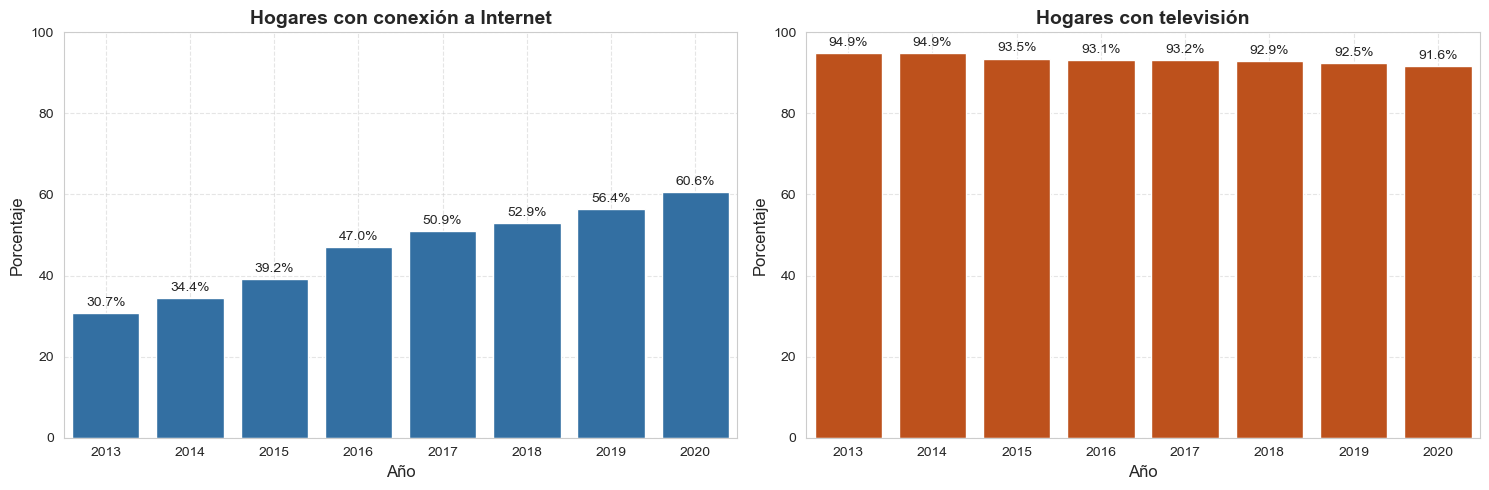

In [135]:
# Configuración de estilo
sns.set_style('whitegrid')

# Definir colores
color_internet = sns.color_palette("Blues", 3)[2]
color_tv = sns.color_palette("Oranges", 3)[2]

# Crear figura con subgráficas
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica de hogares con Internet
sns.barplot(x='año', y='valor', data=hogares_con_internet, ax=ax[0], color=color_internet)
ax[0].set_title('Hogares con conexión a Internet', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Año', fontsize=12)
ax[0].set_ylabel('Porcentaje', fontsize=12)
ax[0].set_ylim(0, 100) 
ax[0].grid(True, linestyle='--', alpha=0.5)

# Agregar etiquetas de valores en las barras
for p in ax[0].containers:
    ax[0].bar_label(p, fmt='%.1f%%', padding=3)

# Gráfica de hogares con televisión
sns.barplot(x='año', y='valor', data=hogares_con_television, ax=ax[1], color=color_tv)
ax[1].set_title('Hogares con televisión', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Año', fontsize=12)
ax[1].set_ylabel('Porcentaje', fontsize=12)
ax[1].set_ylim(0, 100) 
ax[1].grid(True, linestyle='--', alpha=0.5)

# Agregar etiquetas de valores en las barras
for p in ax[1].containers:
    ax[1].bar_label(p, fmt='%.1f%%', padding=3)

# Mejorar presentación
plt.tight_layout()

# Mostrar gráfico
plt.show()

También observamos que es posible representar la evolución de las variables de interés a lo largo del tiempo. Por esta razón, consideramos que una gráfica de líneas es la opción más adecuada, ya que permite visualizar claramente las tendencias y variaciones año tras año.

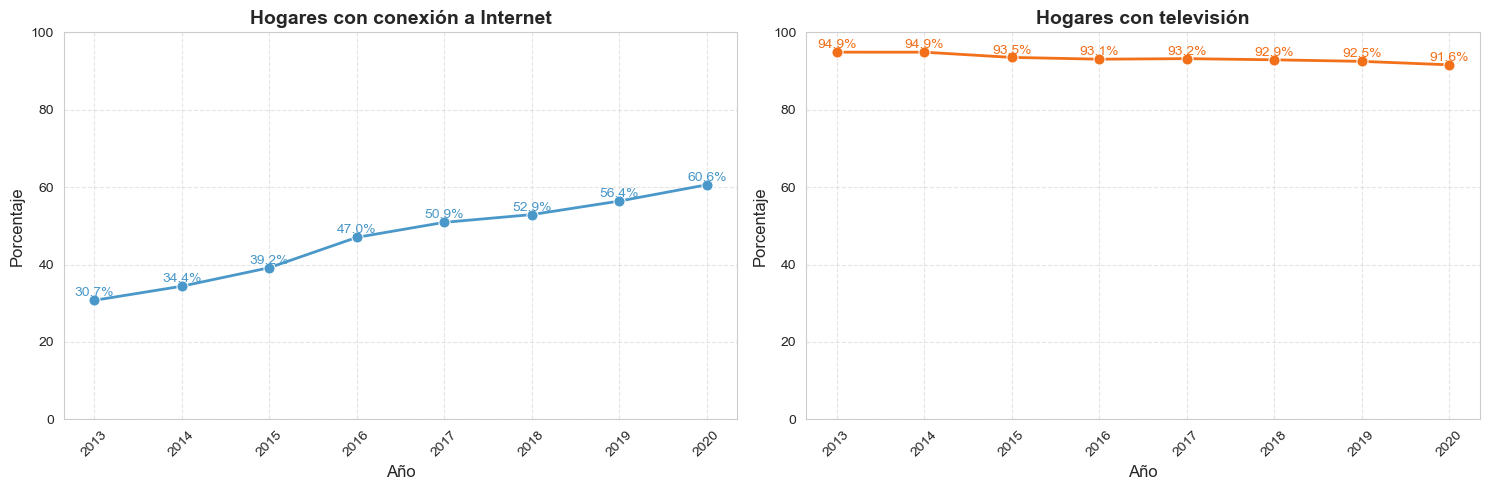

In [136]:
# Configurar el estilo de la gráfica
sns.set_style("whitegrid")

# Crear figura con subgráficas
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Definir colores para cada línea
color_internet = sns.color_palette("Blues", 4)[2]
color_tv = sns.color_palette("Oranges", 4)[2]

# Gráfica de hogares con Internet
sns.lineplot(x='año', y='valor', data=hogares_con_internet, ax=ax[0], 
             marker='o', markersize=8, color=color_internet, linewidth=2)
ax[0].set_title('Hogares con conexión a Internet', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Año', fontsize=12)
ax[0].set_ylabel('Porcentaje', fontsize=12)
ax[0].set_ylim(0, 100)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, linestyle='--', alpha=0.5)

# Agregar etiquetas de valores en los puntos
for x, y in zip(hogares_con_internet['año'], hogares_con_internet['valor']):
    ax[0].text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=10, color=color_internet)

# Gráfica de hogares con televisión
sns.lineplot(x='año', y='valor', data=hogares_con_television, ax=ax[1], 
             marker='o', markersize=8, color=color_tv, linewidth=2)
ax[1].set_title('Hogares con televisión', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Año', fontsize=12)
ax[1].set_ylabel('Porcentaje', fontsize=12)
ax[1].set_ylim(0, 100)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, linestyle='--', alpha=0.5)

# Agregar etiquetas de valores en los puntos
for x, y in zip(hogares_con_television['año'], hogares_con_television['valor']):
    ax[1].text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=10, color=color_tv)

# Mejorar presentación
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## A.3

A partir del archivo *empleo.csv* realizar una visualización donde se comparen los diferentes tipos de ingreso entre hombres y mujeres para los años 2020, 2021, 2022 y 2023. Se sugiere una gráfica de barras agrupadas o una gráfica de barras en espejo.

### Lectura y preprocesamiento de datos

In [137]:
df2 = pd.read_csv('empleo.csv')

In [138]:
hombres = df2[df2['indicador'].str.contains('hombres')]
hombres

,indicador,2020/t1,2020/t3,2020/t4,2021/t1,2021/t2,2021/t3,2021/t4,2022/t1,2022/t2,2022/t3,2022/t4,2023/t1,2023/t2,2023/t3
1,Población ocupada con ingresos de hasta un sal...,5826063,6322878,5942721,6873548,7098715,6985345,6786844,9929421,9625666,9375558,8741934,10457979,10106829,9682092
4,Población ocupada con ingresos de más de 1 has...,12290777,10765223,11391344,12178278,12330129,12255072,12385753,12039850,12415554,12368440,12704349,13008410,12964107,12871486
7,Población ocupada con ingresos de más de 2 has...,5994390,5349630,5695823,4863008,5047971,5115132,5388869,3982966,4042944,4214311,4376223,3521383,3605245,3839058
10,Población ocupada con ingresos de más de 3 has...,2554496,2149659,2416198,2238358,2448181,2478777,2482565,1599296,1578639,1567917,1746206,1331234,1369964,1458623
13,Población ocupada con ingresos de más de 5 sal...,1133530,976533,1056366,830237,865817,915444,940691,577361,665391,546296,640811,501215,499991,547849
16,Población ocupada que no recibe ingresos - 15 ...,1530013,1848729,1800388,1596649,1711560,1916204,1783754,1561499,1613037,1842155,1717683,1532525,1582488,1662289
19,Población ocupada con ingresos no especificado...,3946314,4207464,4154416,4091083,4075017,4334856,4520784,4307541,4587551,4717362,4768334,4533808,4587961,5087813
23,Población ocupada en el sector informal - 15 a...,8895552,8375362,8748542,9047590,9394995,9545323,9629806,9489550,9742920,9578481,9461701,9663102,9596987,9684513
24,"Población ocupada - 15 años y más, hombres",33275583,31620116,32457256,32671161,33577390,34000830,34289260,33997934,34528782,34632039,34695540,34886554,34716585,35149210
28,"Población desocupada - 15 años y más, hombres",1180108,1785698,1604188,1517983,1480051,1461860,1266430,1223642,1150512,1189389,1050100,937365,999950,1080392


In [139]:
mujeres = df2[df2['indicador'].str.contains('mujeres')]
mujeres

,indicador,2020/t1,2020/t3,2020/t4,2021/t1,2021/t2,2021/t3,2021/t4,2022/t1,2022/t2,2022/t3,2022/t4,2023/t1,2023/t2,2023/t3
2,Población ocupada con ingresos de hasta un sal...,6533057,5560712,6167531,6536020,7129711,6814962,6875096,9244845,9358252,8926283,9171055,10513593,10261600,9999300
5,Población ocupada con ingresos de más de 1 has...,7374276,6235563,6810722,6884282,7237185,7386602,7554472,6287491,6625551,6806237,7067771,6768298,7053915,7077215
8,Población ocupada con ingresos de más de 2 has...,2616282,2335998,2494233,2095210,2232315,2268532,2354071,1776824,1744947,1822662,1882469,1508383,1466957,1606912
11,Población ocupada con ingresos de más de 3 has...,1162931,1164515,1192177,1035341,1025631,1085556,1070255,708390,792823,704722,787101,624212,626359,644655
14,Población ocupada con ingresos de más de 5 sal...,420129,384094,425351,344439,330405,379278,358947,248906,245269,248008,249920,161675,194403,224043
17,Población ocupada que no recibe ingresos - 15 ...,1356071,1244565,1233830,1189273,1324586,1441112,1451400,1331971,1424233,1518767,1557052,1385776,1403428,1479101
20,Población ocupada con ingresos no especificado...,2320121,2265150,2342971,2217544,2385525,2459358,2657710,2482762,2700820,2781723,2938445,2643635,2798743,2987036
22,Población ocupada en el sector informal - 15 a...,6253903,5269854,6021008,5785811,6399601,6462539,6691717,6385314,6723342,6609587,6940483,6843200,6938619,7023457
26,"Población ocupada - 15 años y más, mujeres",21782867,19190597,20666815,20302109,21665358,21835400,22321951,22081189,22891895,22808402,23653813,23605572,23805405,24018262
29,"Población desocupada - 15 años y más, mujeres",776409,975380,925181,893880,945455,1009356,884152,782549,767230,850641,746003,659817,694492,744804


In [140]:
# Obtener los años de las columnas que contienen '/'
anyos = [col.split('/')[0] for col in hombres.columns if '/' in col]

# Crear DataFrames vacíos para almacenar los datos por año
hombres_por_anyo = pd.DataFrame()
mujeres_por_anyo = pd.DataFrame()

# Extraer y limpiar los indicadores
hombres_por_anyo['indicador'] = hombres['indicador']
hombres_por_anyo['indicador'] = hombres_por_anyo['indicador'].str.replace('- 15 años y más, hombres', '', regex=False)
mujeres_por_anyo['indicador'] = mujeres['indicador']
mujeres_por_anyo['indicador'] = mujeres_por_anyo['indicador'].str.replace('- 15 años y más, mujeres', '', regex=False)

# Sumar los valores por año y agregarlos a los DataFrames correspondientes
for anyo in sorted(set(anyos)):
    hombres_por_anyo[anyo] = hombres.filter(like=anyo).sum(axis=1)
    mujeres_por_anyo[anyo] = mujeres.filter(like=anyo).sum(axis=1)

In [141]:
hombres_por_anyo.reset_index(drop=True, inplace=True)
hombres_por_anyo

,indicador,2020,2021,2022,2023
0,Población ocupada con ingresos de hasta un sal...,18091662,27744452,37672579,30246900
1,Población ocupada con ingresos de más de 1 has...,34447344,49149232,49528193,38844003
2,Población ocupada con ingresos de más de 2 has...,17039843,20414980,16616444,10965686
3,Población ocupada con ingresos de más de 3 has...,7120353,9647881,6492058,4159821
4,Población ocupada con ingresos de más de 5 sal...,3166429,3552189,2429859,1549055
5,Población ocupada que no recibe ingresos,5179130,7008167,6734374,4777302
6,Población ocupada con ingresos no especificados,12308194,17021740,18380788,14209582
7,Población ocupada en el sector informal,26019456,37617714,38272652,28944602
8,Población ocupada,97352955,134538641,137854295,104752349
9,Población desocupada,4569994,5726324,4613643,3017707


In [142]:
mujeres_por_anyo.reset_index(drop=True, inplace=True)
mujeres_por_anyo

,indicador,2020,2021,2022,2023
0,Población ocupada con ingresos de hasta un sal...,18261300,27355789,36700435,30774493
1,Población ocupada con ingresos de más de 1 has...,20420561,29062541,26787050,20899428
2,Población ocupada con ingresos de más de 2 has...,7446513,8950128,7226902,4582252
3,Población ocupada con ingresos de más de 3 has...,3519623,4216783,2993036,1895226
4,Población ocupada con ingresos de más de 5 sal...,1229574,1413069,992103,580121
5,Población ocupada que no recibe ingresos,3834466,5406371,5832023,4268305
6,Población ocupada con ingresos no especificados,6928242,9720137,10903750,8429414
7,Población ocupada en el sector informal,17544765,25339668,26658726,20805276
8,Población ocupada,61640279,86124818,91435299,71429239
9,Población desocupada,2676970,3732843,3146423,2099113


### Gráficas

Para analizar la evolución de los diferentes tipos de ingreso entre hombres y mujeres en los años 2020, 2021, 2022 y 2023, se eligió una gráfica de barras en espejo. Este tipo de visualización es útil cuando se desea comparar dos categorías (en este caso, hombres y mujeres) a lo largo de varios períodos, ya que permite ver las distribuciones de ambos grupos de manera simultánea, facilitando la comparación directa.

Para facilitar la comparación, se creó una subgráfica para cada año (2020, 2021, 2022 y 2023). De esta manera, podemos observar cómo ha cambiado la distribución de los tipos de ingreso para hombres y mujeres durante estos años de manera clara y ordenada.

Cada una de las subgráficas presenta de forma clara los tipos de ingreso para hombres y mujeres, permitiendo observar las diferencias y similitudes en la distribución de ingresos a lo largo de los años seleccionados. Esta visualización también facilita la comparación directa de los datos, lo cual es muy útil cuando se analizan variaciones a lo largo del tiempo y entre géneros.

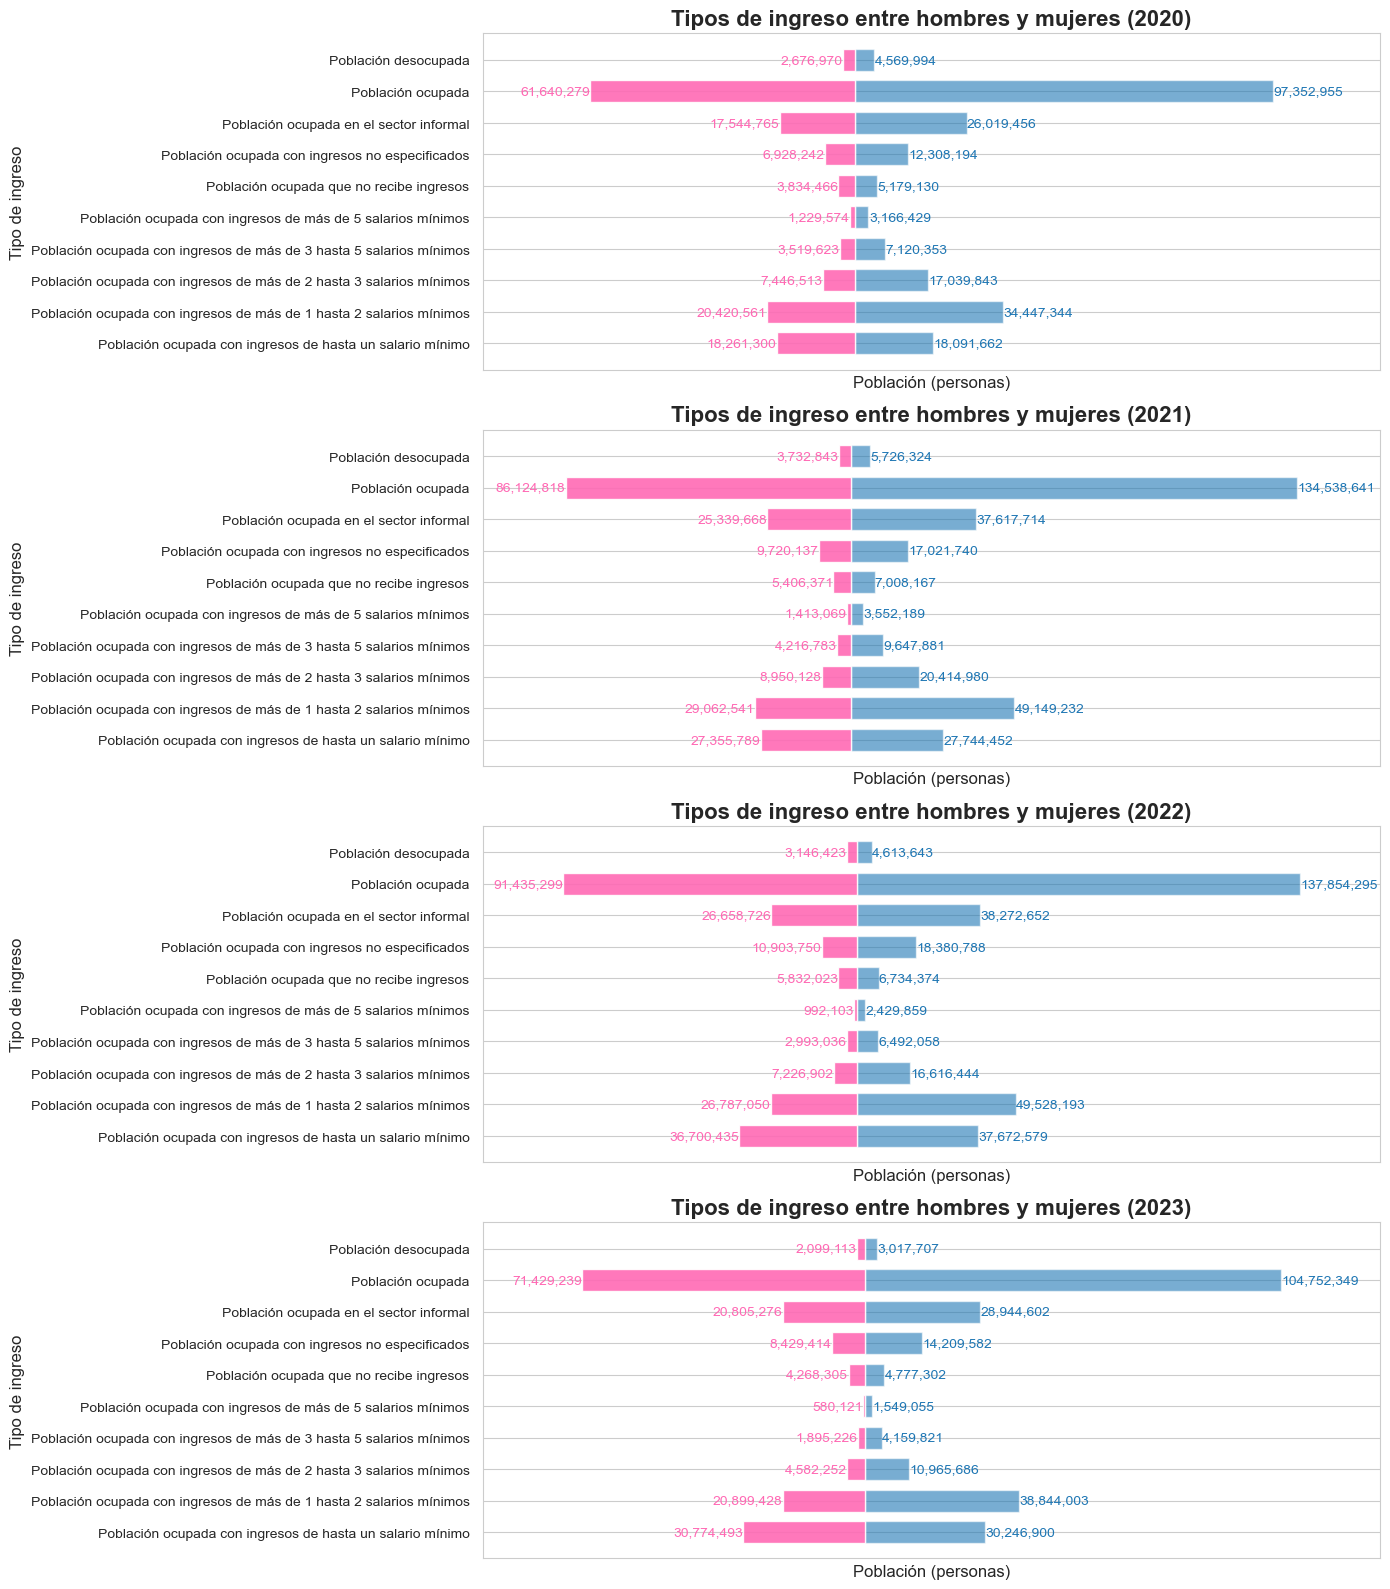

In [143]:
# Crear figura y ejes con un tamaño específico
fig, ax = plt.subplots(4, 1, figsize=(14, 16))

# Colores más suaves para los grupos
color_hombres = '#1f77b4'  # Azul
color_mujeres = '#ff69b4'  # Rosa

# Graficar por cada año
for i, year in enumerate(['2020', '2021', '2022', '2023']):
    ax[i].barh(hombres_por_anyo['indicador'], hombres_por_anyo[year], color=color_hombres, alpha=0.6, label='Hombres', height=0.7)
    ax[i].barh(mujeres_por_anyo['indicador'], -mujeres_por_anyo[year], color=color_mujeres, alpha=0.9, label='Mujeres', height=0.7)

    # Título y etiquetas
    ax[i].set_title(f'Tipos de ingreso entre hombres y mujeres ({year})', weight='bold', fontsize=16)
    ax[i].set_xlabel('Población (personas)', fontsize=12)
    ax[i].set_ylabel('Tipo de ingreso', fontsize=12)

    # Ajustar los límites del eje x para dar más espacio a las etiquetas
    ax[i].set_xlim(-max(mujeres_por_anyo[year]) - 25000000, max(hombres_por_anyo[year]) + 25000000)

    # Mostrar valores en las barras
    for j, tipo in enumerate(hombres_por_anyo['indicador']):
        ax[i].text(hombres_por_anyo[year][j] + 100000, j, f'{hombres_por_anyo[year][j]:,.0f}',
                   va='center', fontsize=10, color=color_hombres, ha='left')
        ax[i].text(-mujeres_por_anyo[year][j] - 100000, j, f'{mujeres_por_anyo[year][j]:,.0f}',
                   va='center', fontsize=10, color=color_mujeres, ha='right')

    # Eliminar el eje x
    ax[i].set_xticks([])

# Mejorar visualización
plt.tight_layout()
plt.show()

## A.4

A partir de la tabla *conjunto_de_datos_defunciones_registradas_2022.csv* generar una visualizacion de un mapa con burbujas que permita visualizar las muertes de mujeres causadas por violencia familiar en Mexico para el año 2022, para los datos totales y por cada 100,000 habitantes. Recomendacion de visualizacion con mapas.

### Lectura y preprocesamiento de datos

In [144]:
df3 = pd.read_csv('defunciones/conjunto_de_datos/conjunto_de_datos_defunciones_registradas_2022.csv', low_memory=False)
df3 = df3[['ent_regis', 'causa_def', 'par_agre', 'sexo']] # Seleccionar columnas de interés
df3.head()

,ent_regis,causa_def,par_agre,sexo
0,1,K254,88,2
1,1,J439,88,2
2,1,E112,88,1
3,1,I269,88,1
4,1,W104,88,1


In [145]:
# De acuerdo con la Nota de la practica, se seleccionan las causas de violencia
causas_violencia = ("X850","X854","X870","X877","X880","X888","X889","X898","X899","X900","X904","X908","X909",
"X910","X911","X912","X913","X914","X915","X916","X917","X918","X919","X920","X922","X924",
"X925","X927","X928","X929","X930","X934","X935","X936","X937","X938","X939","X940","X944",
"X945","X947","X949","X950","X951","X952","X953","X954","X955","X956","X957","X958","X959",
"X964","X966","X968","X969","X970","X971","X974","X975","X977","X978","X979","X984","X990",
"X991","X992","X993","X994","X995","X996","X997","X998","X999","Y000","Y001","Y004","Y005",
"Y007","Y008","Y009","Y010","Y014","Y018","Y019","Y024","Y034","Y040","Y041","Y043","Y044", 
"Y045","Y046","Y048","Y049","Y050","Y059","Y061","Y068","Y069","Y078","Y079","Y080","Y084",
"Y085","Y086","Y087","Y088","Y089","Y090","Y091","Y092","Y093","Y094","Y095","Y096","Y097",
"Y098","Y099")

In [146]:
# Filtrar el DataFrame para obtener solo las filas que cumplen con las condiciones especificadas:
# - La causa de defunción está en la lista de causas de violencia
# - El parentesco del agresor está en los rangos especificados (1-26 o 37-52)
# - El sexo es femenino (2)
df3 = df3[(df3['causa_def'].isin(causas_violencia)) & (df3['par_agre'].between(1, 26) | df3['par_agre'].between(37, 52)) & (df3['sexo'] == 2)]

df3.head()

,ent_regis,causa_def,par_agre,sexo
7209,1,X910,45,2
36852,3,X994,5,2
37451,3,Y061,2,2
60694,5,X990,11,2
69514,6,X954,8,2


Se utilizo el geoJSON de https://github.com/angelnmara/geojson/blob/master/mexicoHigh.json para obtener los centroides de los estados.

In [147]:
# Leer el archivo GeoJSON de México
gdf = gpd.read_file("mexicoHigh.json")

# Convertir el sistema de coordenadas a EPSG:6372
gdf = gdf.to_crs(epsg=6372)

# Calcular el centroide de cada geometría
gdf["centroide"] = gdf.geometry.centroid

# Establecer el centroide como la geometría principal y convertir el sistema de coordenadas a EPSG:4326
gdf = gdf.set_geometry("centroide").to_crs(epsg=4326)

# Extraer las coordenadas de latitud y longitud de los centroides
gdf["latitud"] = gdf["centroide"].y
gdf["longitud"] = gdf["centroide"].x

In [148]:
ent_regis_to_estado = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche', 5: 'Coahuila',
    6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México', 10: 'Durango', 11: 'Guanajuato',
    12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 16: 'Michoacán', 17: 'Morelos',
    18: 'Nayarit', 19: 'Nuevo León', 20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo',
    24: 'San Luis Potosí', 25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas', 29: 'Tlaxcala',
    30: 'Veracruz', 31: 'Yucatán', 32: 'Zacatecas'
}

poblacion = {'Aguascalientes': 1425607, 'Baja California': 3769020, 'Baja California Sur': 798447, 'Campeche': 928363, 'Coahuila':3146771,
    'Colima': 731391, 'Chiapas': 5543828, 'Chihuahua': 3741869, 'Ciudad de México': 9209944, 'Durango': 1832650, 'Guanajuato':6166934,
    'Guerrero': 3540685, 'Hidalgo': 3082841, 'Jalisco': 8348151, 'México': 16992418, 'Michoacán': 4748846, 'Morelos': 1971520,
    'Nayarit': 1235456, 'Nuevo León': 5784442, 'Oaxaca': 4132148, 'Puebla': 6583278, 'Querétaro': 2368467, 'Quintana Roo': 1857985,
    'San Luis Potosí': 2822255, 'Sinaloa': 3026943, 'Sonora': 2944840, 'Tabasco': 2402598, 'Tamaulipas': 3527735, 'Tlaxcala': 1342977,
    'Veracruz': 8062579, 'Yucatán': 2320898	, 'Zacatecas':1622138
}

Poblacion extraida de https://iplaneg.guanajuato.gob.mx/indicadores/tablero2351e

In [149]:
# Agrupar los datos por entidad y contar el número de defunciones
violencia_familiar_por_estado = df3.groupby('ent_regis').size().reset_index(name='conteo')

# Mapear los códigos de entidad a nombres de estado
violencia_familiar_por_estado['ent_regis'] = violencia_familiar_por_estado['ent_regis'].map(ent_regis_to_estado)

# Unir los datos de defunciones con los datos geográficos
violencia_familiar_por_estado = violencia_familiar_por_estado.merge(gdf[['name', 'latitud', 'longitud']], left_on='ent_regis', right_on='name', how='left')

# Eliminar la columna 'name' ya que no es necesaria
violencia_familiar_por_estado.drop(columns=['name'], inplace=True)

# Unir los datos de poblacion
violencia_familiar_por_estado['poblacion'] = violencia_familiar_por_estado['ent_regis'].map(poblacion)

# Mostrar el DataFrame resultante
violencia_familiar_por_estado

,ent_regis,conteo,latitud,longitud,poblacion
0,Aguascalientes,1,21.977486,-102.384045,1425607
1,Baja California Sur,2,25.869355,-112.002241,798447
2,Coahuila,1,27.277716,-102.097041,3146771
3,Colima,1,19.140844,-103.921684,731391
4,Chiapas,3,16.488390,-92.475873,5543828
5,Chihuahua,1,28.812297,-106.449967,3741869
6,Ciudad de México,2,19.237751,-99.087561,9209944
7,Durango,4,24.897777,-104.983988,1832650
8,Guanajuato,2,20.897326,-101.037816,6166934
9,Hidalgo,1,20.482438,-98.857605,3082841


In [150]:
# Crear el mapa centrado en México
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Agregar círculos al mapa según la cantidad de defunciones
for _, estado in violencia_familiar_por_estado.iterrows():
    local_deformation = math.cos(estado['latitud'] * math.pi / 180)
    folium.Circle(
        location=[estado["latitud"], estado["longitud"]],
        popup=f"{estado['ent_regis']}: {estado['conteo']} defuncion(es)",
        radius=estado['conteo'] * 20000.0 * local_deformation,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Agregar título al mapa
titulo_html = """
<div style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%);
            background-color: white; padding: 10px; font-size: 20px; font-weight: bold;
            border-radius: 5px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
            z-index: 1000;">
    Muertes de mujeres causadas por violencia familiar en México (2022)
</div>
"""
m.get_root().html.add_child(Element(titulo_html))

# Mostrar el mapa
m

In [151]:
# Crear el mapa centrado en México
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Agregar círculos al mapa según la tasa de defunciones por 100,000 habitantes
for _, estado in violencia_familiar_por_estado.iterrows():
    if estado['poblacion'] > 0:  # Evitar divisiones por cero
        tasa = (estado['conteo'] / estado['poblacion']) * 100000
        local_deformation = math.cos(estado['latitud'] * math.pi / 180)

        folium.Circle(
            location=[estado["latitud"], estado["longitud"]],
            popup=f"{estado['ent_regis']}: {tasa:.2f} defunciones por 100,000 hab.",
            radius=tasa * 500000 * local_deformation,  # Escalado ajustado
            color='purple',
            fill=True,
            fill_color='purple'
        ).add_to(m)

# Agregar título al mapa
titulo_html = """
<div style="position: fixed; top: 10px; left: 50%; transform: translateX(-50%);
            background-color: white; padding: 10px; font-size: 20px; font-weight: bold;
            border-radius: 5px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
            z-index: 1000;">
    Muertes de mujeres causadas por violencia familiar en México por cada 100,000 hab. (2022)
</div>
"""
m.get_root().html.add_child(Element(titulo_html))

# Mostrar el mapa
m